Aarón Villegas Kane

1848627

Estadística Aplicada

G51

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pip install lifelines

  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=57149937e98f832923b62ed19d2668af67643a51458be4cbefe46760d86deeeb
  Stored in directory: c:\users\aaron\appdata\local\pip\cache\wheels\a8\03\64\8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.


In [3]:
from lifelines import*

In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/aaron-v-kane/Tareas_EstadisticaAplicada_15/main/supervivencia_examenes.csv")

In [53]:
df.mean()

C:\Users\aaron\AppData\Local\Temp/ipykernel_12944/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


id                9.000000
tiempo          107.352941
examen            1.000000
calificación     90.705882
dtype: float64

In [54]:
df.groupby('género').mean()

,id,tiempo,examen,calificación
género,,,,
f,8.750000,108.125000,1.0,93.000000
m,9.222222,106.666667,1.0,88.666667


Los alumnos respondieron, en promedio, más rápido el examen, sin embargo, las alumnas obtuvieron mejor calificación.

In [9]:
from lifelines import KaplanMeierFitter

In [11]:
kmf = KaplanMeierFitter()

In [55]:
masc = df[df['género'] == 'm']
fem = df[df['género'] == 'f']

TM = masc['tiempo']
CM = masc['calificación']
EM = masc['examen']

TF = fem['tiempo']
CF = fem['calificación']
EF = fem['examen']

,df
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


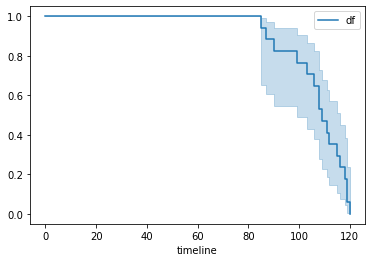

In [56]:
#todos
kmf.fit(df['tiempo'], df['examen'], label = "df").plot()
kmf.survival_function_

In [57]:
kmf.fit(df['tiempo'], df['examen'], label = "df")
kmf.confidence_interval_

,df_lower_0.95,df_upper_0.95
0.0,1.000000,1.000000
85.0,0.650179,0.991499
87.0,0.605979,0.969209
90.0,0.547132,0.939405
99.0,0.488278,0.904486
103.0,0.431478,0.865599
106.0,0.377147,0.823381
108.0,0.276168,0.730267
109.0,0.229598,0.679678
111.0,0.185759,0.626432


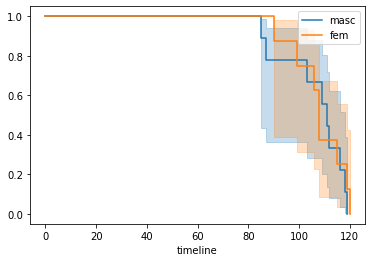

In [58]:
#separado
ax = plt.subplot(111)
ax = kmf.fit(TM, EM, label = "masc").plot(ax=ax)
ax = kmf.fit(TF, EF, label = "fem").plot(ax=ax)

Dado que ambos graficos se entrelazan una cantidad considerable, parece ser que no hay evidencia suficiente como para decire que las alumnas responden más rápido.

In [33]:
from lifelines.statistics import logrank_test

In [59]:
results = logrank_test(TM, TF, event_observed_A = EM, event_observed_B = EF)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

Como p-valor > alfa, no rechazamos H0, por lo que hay evidencia estadística suficiente para decir que las alumnas no contestan más rápido.

In [35]:
from lifelines import CoxPHFitter

In [65]:
#cambiar datos de columna género de m,f a 1,0
#m = 1; f = 0
df["género"] = np.where(df["género"] == "f", 0, 1)

In [67]:
cph = CoxPHFitter()
cph.fit(df, duration_col='tiempo', event_col='examen')

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>

In [68]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2022-05-08 21:45:38 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género         0.50       1.66       0.80            -1.07             2.08                 0.34                 7.99

               cmp to    z    p   -log2(p)
covariate                                 
id               0.00 0.42 0.67       0.57
calificación     0.00 0.47 0.64       0.64
género           0.00 0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

<AxesSubplot:xlabel='log(HR) (95% CI)'>

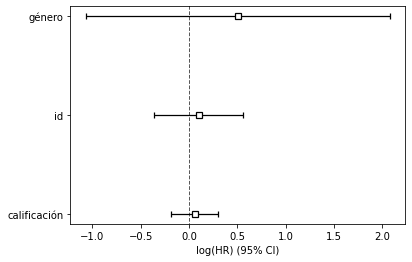

In [69]:
cph.plot()

Dado que los coeficientes de calificación, así como los de género, tienen p-valor > alfa, no se rechaza H0; de tal manera que estos no son significativos, por lo que podemos decir que ni el género ni la calificación influyen en el evento (entregar el examen).